<a href="https://colab.research.google.com/github/GrandMoff100/MiscColabNotebooks/blob/main/OptimizeTrigPolynomialCoefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Expected: y = 4.274910294377404 sin(1x) + 4.532660854534722 sin(2x) + 9.377136236531008 sin(3x) + 6.782666371954767 sin(4x)
Result: y = 4.321869850158691 sin(1x) + 4.579502105712891 sin(2x) + 9.423508644104004 sin(3x) + 6.829417705535889 sin(4x)


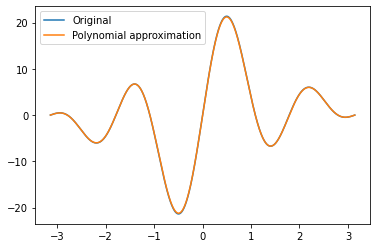

In [12]:
import torch
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")

k = 4  # Generalize for all K
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)

def trig_poly(*coefs):
    poly = 0
    for i, coef in enumerate(coefs):
        poly += coef * torch.sin(x * (i + 1))
    return poly

def create_tensors(count):
    return [torch.randn((), device=device, dtype=dtype, requires_grad=True) for _ in range(count)]

coeffs = 10 * np.random.rand(k)
y = trig_poly(*coeffs)
tensors = create_tensors(k)
optimizer = optim.Adadelta(tensors, lr=0.3)

for t in range(100000):
    optimizer.zero_grad()
    y_pred = trig_poly(*tensors)
    loss = torch.sum((y_pred - y)**2)
    loss.backward()
    optimizer.step()
    if t % 10000 == 0:
        print(t)


print(f'Expected: y =', " + ".join([f"{co} sin({i + 1}x)" for i, co in enumerate(coeffs)]))
print(f'Result: y =', " + ".join([f"{co} sin({i + 1}x)" for i, co in enumerate(tensors)]))

plt.plot(x, y, label='Original')
plt.plot(x, y_pred.detach(), label='Polynomial approximation')
plt.legend()

plt.show()